<a href="https://colab.research.google.com/github/nisha1365/TECHNICAL_TRAINING_CTS/blob/main/Nisha_2211566_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Task for the AI



## Prerequisite 

## Numpy - 
NumPy is a Python library used for working with arrays

## Matplotlib - 
Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy.

## Random 
Generating Random Numbers.

## keras 
Keras is a high-level, deep learning API developed by Google for implementing neural networks. It is written in Python and is used to make the implementation of neural networks easy. It also supports multiple backend neural network computation

## Sequential 
The cognitive and neural processes involved in learning about the proper ordering of events and stimuli are called sequential learning.

## Dense
Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer

## Flatten
Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector.


## Dropout 
Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass

## Activation 
The activation function compares the input value to a threshold value. If the input value is greater than the threshold value, the neuron is activated. It's disabled if the input value is less than the threshold value, which means its output isn't sent on to the next or hidden layer

## MNIST
MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms. MNIST is short for Modified National Institute of Standards and Technology database.

## Utils
np_utils. to_categorical is used to convert array of labeled data(from 0 to nb_classes - 1 ) to one-hot vector

In [ ]:
import numpy as np                 # advanced math library
import matplotlib.pyplot as plt    # MATLAB like plotting routines
import random                      # For generating random number
%matplotlib inline


from keras.datasets import mnist      # MNIST dataset is included in keras
from keras.models import Sequential   # Model type to be used

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# Loading Training Data

Splitting the MNIST data and checking it's shape for each category

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


## Interpolation 
Interpolation is a technique in Python used to estimate unknown data points between two known data points. Interpolation is mostly used to impute missing values in the dataframe or series while preprocessing data.

##tight_layout 
automatically adjusts subplot params so that the subplot(s) fits in to the figure area. This is an experimental feature and may not work for some cases. It only checks the extents of ticklabels, axis labels, and titles

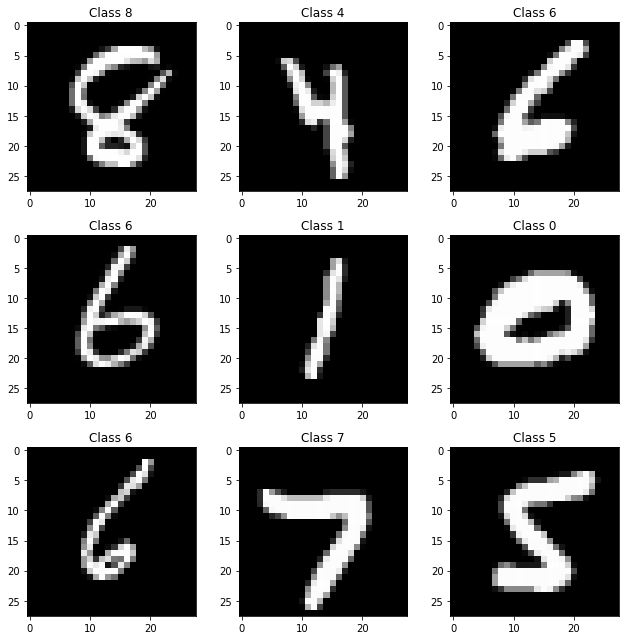

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0,len(X_train))
  plt.imshow(X_train[num], cmap = 'gray', interpolation = 'none')
  plt.title("Class {}".format(y_train[num]))

plt.tight_layout()




##Python enumerate() Function

The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object. The enumerate() function adds a counter as the key of the enumerate object.

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    5   24   24  128  202  253  184   0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    9   47   47   47  162  178  252  252  252  253  252  215  21  0  0  0  
0  0  0  0  0  0  0    0    0    0    0  132  197  252  252  252  253  252  252  252  252  253  252  183   0  0  0  0  
0  0  0  0  0  0  0    0    0   34  197  253  252  252  252  252  253  252  252  252  252  253  235  117   0  0  0  0  
0  0  0  0  0  0  0    0   32  218  252 

###  Reshaping Images and Normalizing is by dividing it by maximum Pixel limit value.

In [ ]:
X_train = X_train.reshape(60000, 784)   # reshape 60,000 28*28 matrices into
X_test = X_test.reshape(10000, 784)     # reshape 10,000 28*28 matrices into

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255   # normalize each value for each pixel 


Printing the shape of X_train and X_test data Images

In [ ]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)      

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


One - hot encoding for the categorical labels.

In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

* The Sequential model is a linear stack of layers. The common architecture of ConvNets is a sequential architecture. However, some architectures are not linear stacks. For example, siamese networks are two parallel neural networks with some shared layers

In [ ]:
# The Sequential model is a linear stack of layers
model = Sequential()

* In a Keras layer, the input shape is generally the shape of the input data provided to the Keras model while training. The model cannot know the shape of the training data. The shape of other tensors(layers) is computed automatically

In [ ]:
# The first hidden layer is a set of 512 nodes (artifical neurons)
# Each 
model.add(Dense(512, input_shape = (784,)))

* Activation function is a simple mathematical function that transforms the given input to the required output that has a certain range.

* The rectified linear activation function or ReLU is a non-linear function or piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.
It is the most commonly used activation function in neural networks, especially in Convolutional Neural Networks (CNNs) & Multilayer perceptrons.

It is simple yet it is more effective than it's predecessors like sigmoid or tanh.

In [ ]:
model.add(Activation('relu'))

* Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass

In [ ]:
model.add(Dropout(0.2))

In [ ]:
# Adding Second layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# The Final Output Layer

In [ ]:
model.add(Dense(10))

In [ ]:
model.add(Activation('softmax'))

Keras provides a way to summarize a model.

The summary is textual and includes information about:

* The layers and their order in the model.
* The output shape of each layer.
* The number of parameters (weights) in each layer.
* The total number of parameters (weights) in the model.

In [ ]:
# Summary of the model

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 activation_17 (Activation)  (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 activation_18 (Activation)  (None, 512)               0         
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)               

# To sum-up: 
* 'trainable parameters' are those which value is modified according to their gradient (the derivative of the error/loss/cost relative to the parameter), whereas 'non-trainable parameters' are those which value is not optimized according to their gradient.

In keras, non-trainable parameters (as shown in model.summary()) means the number of weights that are not updated during training with backpropagation.

There are mainly two types of non-trainable weights:

The ones that you have chosen to keep constant when training. This means that keras won't update these weights during training at all.
The ones that work like statistics in BatchNormalization layers. They're updated with mean and variance, but they're not "trained with backpropagation".
Weights are the values inside the network that perform the operations and can be adjusted to result in what we want. The backpropagation algorithm changes the weights towards a lower error at the end.

By default, all weights in a keras model are trainable.

When you create layers, internally it creates its own weights and they're trainable. (The backpropagation algorithm will update these weights)

When you make them untrainable, the algorithm will not update these weights anymore. This is useful, for instance, when you want a convolutional layer with a specific filter, like a Sobel filter, for instance. You don't want the training to change this operation, so these weights/filters should be kept constant.

There is a lot of other reasons why you might want to make weights untrainable.

## Compiling the model

### Model compile - 
Compile defines the loss function, the optimizer and the metrics. That's all. It has nothing to do with the weights and you can compile a model as many times as you want without causing any problem to pretrained weights. You need a compiled model to train (because training uses the loss function and the optimizer).

### Loss function
A loss function is a function that compares the target and predicted output values; measures how well the neural network models the training data. When training, we aim to minimize this loss between the predicted and target outputs.

### Optimizer
In deep learning, optimizers are used to adjust the parameters for a model. The purpose of an optimizer is to adjust model weights to maximize a loss function. The loss function is used as a way to measure how well the model is performing.

### Adam
The name is derived from adaptive moment estimation. The optimizer is called Adam because uses estimations of the first and second moments of the gradient to adapt the learning rate for each weight of the neural network. The name of the optimizer is Adam; it is not an acronym.


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',
              metrics = ['accuracy'])


## Fitting the model

### Batch size
refers to the number of training examples utilized in one iteration. The batch size can be one of three options: batch mode: where the batch size is equal to the total dataset thus making the iteration and epoch values equivalent.

### Epoch
Epoch is once all images are processed one time individually of forward and backward to the network, then that is one epoch. I like to make sure my definition of epoch is correct. One epoch is counted when (Number of iterations * batch size) / total number of images in training.

### verbose 
verbose is the choice that how you want to see the output of your Nural Network while it's training. If you set verbose = 0, It will show nothing.

In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, epochs = 10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2479 - accuracy: 0.9264
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1003 - accuracy: 0.9690
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0707 - accuracy: 0.9773
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0555 - accuracy: 0.9818
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0443 - accuracy: 0.9859
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0381 - accuracy: 0.9876
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0328 - accuracy: 0.9891
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0310 - accuracy: 0.9904
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0297 - accuracy: 0.9902
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0251 - accura

## Evaluating the model

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0744 - accuracy: 0.9808
Test score: 0.07437101751565933
Test accuracy: 0.9807999730110168


### Argmax 
It is an operation that finds the argument that gives the maximum value from a target function. Argmax is most commonly used in machine learning for finding the class with the largest predicted probability. Argmax can be implemented manually, although the argmax() NumPy function is preferred in practice

In [ ]:
predicted_x = model.predict(X_test)
predicted_classes = np.argmax(predicted_x, axis = 1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 2ms/step


## Plotting the Figure

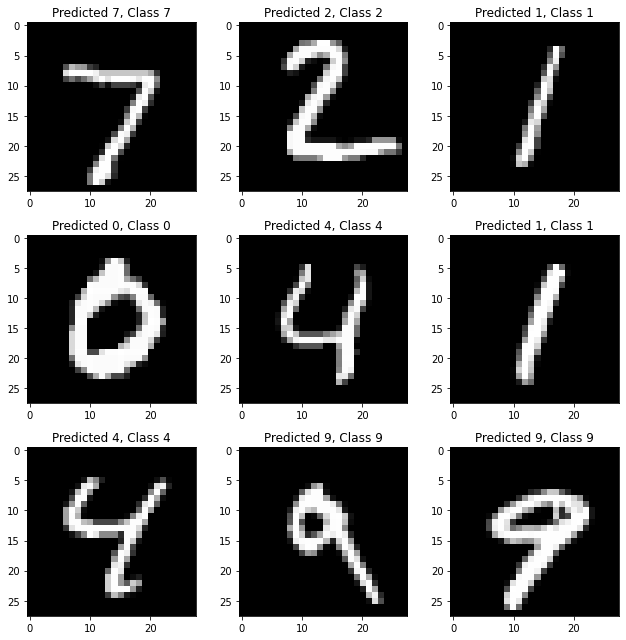

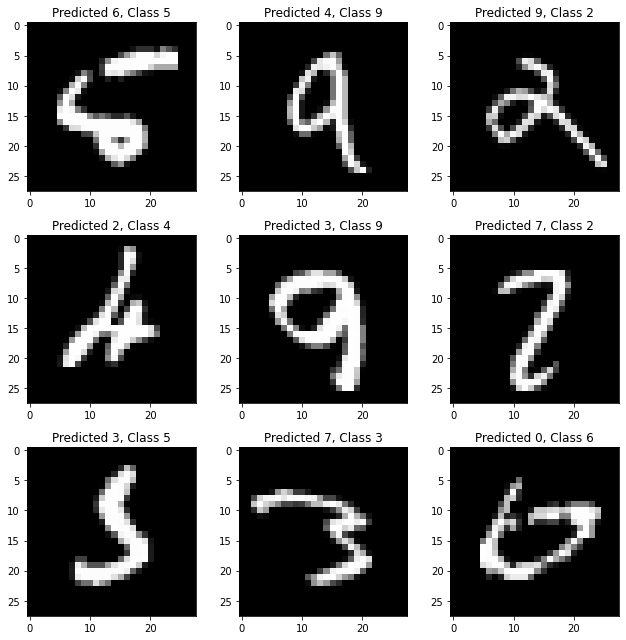

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

# Building a "Deep" Convolutional Neural Network

## Image Data Generator
Introduction to Keras ImageDataGenerator. Keras ImageDataGenerator is used for getting the input of the original data and further, it makes the transformation of this data on a random basis and gives the output resultant containing only the data that is newly transformed. It does not add the data.

## Conv2D
Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

## MaxPooling
Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.
Max pooling is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation.

## Zero padding
Zero padding is a technique typically employed to make the size of the input sequence equal to a power of two. In zero padding, you add zeros to the end of the input sequence so that the total number of samples is equal to the next higher power of two.

## Flatten
Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector. The flattened matrix is fed as input to the fully connected layer to classify the image

## Batch Normalization
Batch normalization is a technique for training very deep neural networks that normalizes the contributions to a layer for every mini-batch. This has the impact of settling the learning process and drastically decreasing the number of training epochs required to train deep neural networks.

## Global Average Pooling
globalAveragePooling2d() function is used for applying global average pooling operation for spatial data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D,Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization

Loading MNIST Data set

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Again reshaping the data accordingly to the convoluted layer.

In [ ]:
X_train = X_train.reshape(60000, 28,28,1)   # reshape 60,000 28*28 matrices into
X_test = X_test.reshape(10000, 28,28,1)     # reshape 10,000 28*28 matrices into

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255   # normalize each value for each pixel 

In [ ]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()

In [ ]:
#Convolution Layer 1
model.add(Conv2D(32,(3,3), input_shape=(28,28,1)))


In [ ]:
model.add(BatchNormalization(axis=-1))

In [ ]:
convLayer01 = Activation('relu')

In [ ]:
model.add(convLayer01)

In [ ]:
# Convultional Layer 2
model.add(Conv2D(32,(3,3)))



In [ ]:
model.add(BatchNormalization(axis = -1))

In [ ]:
model.add(Activation('relu'))

In [ ]:
convLayer02 = MaxPooling2D(pool_size=(2,2))

In [ ]:
model.add(convLayer02)

* Axis: the axis of your data which you like Batch Normalization to be applied on. Usually, this is not of importance, but if you have a channels-first Conv layer, it must be set to 1. Momentum: the momentum that is to be used on the moving mean and the moving variance.

* BatchNormalization computes statistics only with respect to a single axis (usually the channels axis, =-1 (last) by default); every other axis is collapsed, i.e. summed over for averaging; 

In [ ]:
from keras.backend import conv2d
# Convolution Layer 3
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis = -1))
convLayer03 = Activation('relu')
model.add(convLayer03)


In [ ]:
# Convolution Layer 4

model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis = -1))
convLayer03 = Activation('relu')
convLayer04 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer04)
model.add(Flatten())

In [ ]:
# Fully connected Layer 5
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

In [ ]:
# Fully Connected Layer 6
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 activation_20 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 activation_21 (Activation)  (None, 24, 24, 32)       

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08,
                         shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(X_train,Y_train,batch_size = 128)
test_generator = test_gen.flow(X_test, Y_test, batch_size = 128)

In [ ]:
model.fit_generator(train_generator, steps_per_epoch=60000//128,epochs=5, verbose = 1,
                    validation_data = test_generator, validation_steps = 10000//128)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


468/468 [==============================] - 115s 243ms/step - loss: 0.1360 - accuracy: 0.9581 - val_loss: 0.1029 - val_accuracy: 0.9683
Epoch 2/5
468/468 [==============================] - 114s 243ms/step - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.0274 - val_accuracy: 0.9916
Epoch 3/5
468/468 [==============================] - 113s 241ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0555 - val_accuracy: 0.9826
Epoch 4/5
468/468 [==============================] - 112s 240ms/step - loss: 0.0371 - accuracy: 0.9884 - val_loss: 0.0281 - val_accuracy: 0.9906
Epoch 5/5
468/468 [==============================] - 112s 240ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.0219 - val_accuracy: 0.9924


### Evaluating the model

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# Test accuracy is - 0.99




